## Линейная регрессия

В этом практическом задании четыре обязательных и одна дополнительная задача. 
<br>
*Обязательные задачи* помогут проверить, что вы действительно усвоили материал. Если у вас всё получилось, можете переходить к следующей теме.
<br>
*Дополнительная задача* для тех, кто хочет потренироваться в подготовке данных для обучения модели и использовании алгоритма линейной регрессии. 
<br>
Удачи!

Цели практического задания: 

1.   Научиться пользоваться моделью линейной регрессии.
2.   Потренироваться в использовании метрики MAE.
3.   Научиться использовать категориальные фичи для задачи линейной регрессии.




В этом практическом задании вы будете работать с данными, которые мы разбирали в видео. В них указаны расходы, выставленные медицинскими страховыми компаниями по клиентам.

Этот датасет мы будем использовать для предсказания расходов по страховке, исходя из характеристик клиента.

**Описание данных:**

*age*: возраст;

*sex*: пол женский/мужской;

*bmi*: индекс массы тела;

*children*: количество детей/иждивенцев, входящих в страховку;

*smoker*: курящий/некурящий;

*region*: район проживания в США, северо-восток, юго-восток, юго-запад, северо-запад;

*charges*: расходы по страховке.

## Обязательные задачи

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split 

In [140]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Задача 0. Подготовка данных для обучения**

Проделайте следующие шаги на этом датафрейме:

1. Создайте датафрейм, положите в него данные по клиентам-женщинам, у которых нет детей, и сумма страховки менее 15 тысяч долларов.
2. Постройте график зависимости стоимости страховки от возраста. Проверьте, что у вас получился следующий график.

<Axes: xlabel='age', ylabel='charges'>

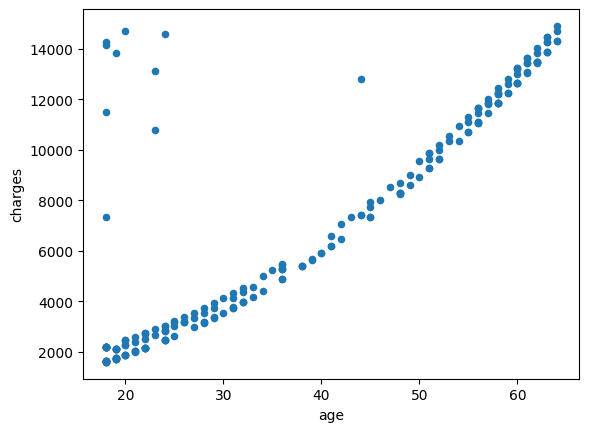

In [83]:
# Ваш код здесь
df_female = df[(df.sex == 'female') & (df.children == 0) & (df.charges < 15000)]
df_female.plot(kind='scatter', x='age', y='charges')

**Задача 1. Удаление выбросов и обучение модели линейной регрессии**

Проделайте следующие шаги:

3. Удалите  значения charges в выбросах, их на картинке 10 штук. Заново отрисуйте график и убедитесь, что выбросы действительно удалены.
4. Поделите данные на треин и тест выборку в отношении 80/20.
5. Обучите модель линейной регрессии с дефолтными параметрами на одной входной фиче: age; померьте качество на тесте с помощью метрики MAE.

In [84]:
df_female.head()

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.740,0,no,southeast,3756.62160
13,56,female,39.820,0,no,southeast,11090.71780
20,60,female,36.005,0,no,northeast,13228.84695
26,63,female,23.085,0,no,northeast,14451.83515
31,18,female,26.315,0,no,northeast,2198.18985


In [85]:
def is_outlier(df, age, charges):
    # Определяем границы возрастной группы (±2 года)
    age_min = age - 2
    age_max = age + 2
    
    # Фильтруем данные по возрасту
    df_age_group = df[(df['age'] >= age_min) & (df['age'] <= age_max)]
    
    # Если выборка пуста, то нет смысла искать выбросы
    if df_age_group.empty:
        return False

    # IQR-анализ
    Q1 = df_age_group['charges'].quantile(0.25)
    Q3 = df_age_group['charges'].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR  # Используем 1.5, как в классическом IQR
    upper_bound = Q3 + 1.5 * IQR

    return charges < lower_bound or charges > upper_bound

In [86]:
for index, row in df_female.sort_values(['age', 'charges']).iterrows():
    print(index, row['age'], row['charges'], is_outlier(df_female, row['age'], row['charges']))

359 18 1607.5101 False
236 18 1615.7667 False
822 18 1621.8827 False
482 18 1622.1885 False
1335 18 1629.8335 False
399 18 1631.6683 False
181 18 1631.8212 False
600 18 1633.0444 False
1248 18 1633.9618 False
898 18 1634.5734 False
492 18 2196.4732 False
31 18 2198.18985 False
1163 18 2200.83085 False
471 18 2203.47185 False
1150 18 2203.73595 False
1334 18 2205.9808 False
612 18 2207.69745 False
50 18 2211.13075 False
942 18 2217.46915 False
728 18 2217.6012 False
427 18 7323.734819 True
525 18 11482.63485 True
354 18 14133.03775 True
1282 18 14283.4594 True
232 19 1727.785 False
1129 19 1728.897 False
1316 19 1731.677 False
311 19 1737.376 False
65 19 1743.214 False
472 19 1744.465 False
490 19 1748.774 False
973 19 1759.338 False
899 19 2117.33885 False
565 19 2128.43105 False
200 19 2130.6759 False
414 19 2134.9015 False
807 19 2136.88225 False
391 19 2138.0707 False
362 19 13844.506 True
855 20 1875.344 False
815 20 1877.9294 False
614 20 1880.07 False
1268 20 1880.487 False
122 2

<Axes: xlabel='age', ylabel='charges'>

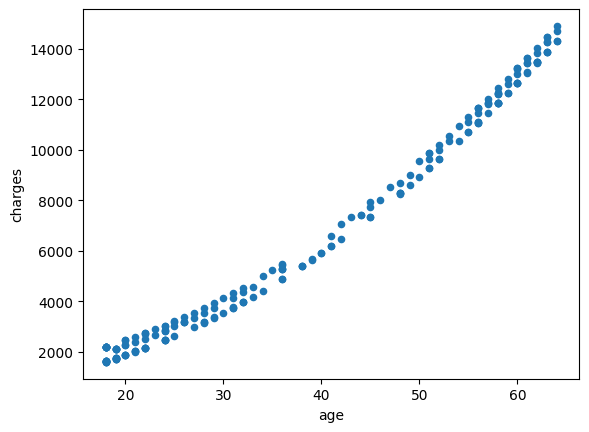

In [87]:
# Ваш код здесьb
df_female_cleaned = df_female[df_female.apply(lambda x: is_outlier(df_female, x.age, x.charges) == False, axis=1)]
df_female_cleaned.plot(kind='scatter', x='age', y='charges')

In [115]:
train, test = train_test_split(df_female_cleaned, test_size=0.2, random_state=42)
train.head()

,age,sex,bmi,children,smoker,region,charges
521,32,female,44.220,0,no,southeast,3994.17780
579,25,female,23.465,0,no,northeast,3206.49135
671,29,female,31.160,0,no,northeast,3943.59540
789,62,female,29.920,0,no,southeast,13457.96080
523,38,female,37.730,0,no,southeast,5397.61670


In [89]:
lr = LinearRegression()

In [90]:
lr.fit(train[['age']], train.charges)

LinearRegression()

In [91]:
pred = lr.predict(test[['age']])

In [92]:
mean_absolute_error(test.charges, pred)

589.2828328455392

**Задача 2. Обучение модели линейной регрессии на нескольких фичах**

Обучите модель линейной регрессии с дефолтными параметрами на данных из предыдущего задания на всех непрерывных фичах, которые есть в датасете. Заранее удалите фичи, в которых присутствует только одно единственное значение.

Рассчитайте новое значение метрики на тестовой выборке. Улучшилась ли метрика по сравнению с предыдущим заданием?

In [119]:
train.head()

,age,bmi,charges,northeast,northwest,southeast,southwest
521,32,44.220,3994.17780,0,0,1,0
579,25,23.465,3206.49135,1,0,0,0
671,29,31.160,3943.59540,1,0,0,0
789,62,29.920,13457.96080,0,0,1,0
523,38,37.730,5397.61670,0,0,1,0


In [116]:
train[pd.get_dummies(train.region).columns] = pd.get_dummies(train.region).astype('int64')
test[pd.get_dummies(test.region).columns] = pd.get_dummies(test.region).astype('int64')

In [118]:
train = train.drop(['sex', 'children', 'smoker', 'region'], axis=1)
test = test.drop(['sex', 'children', 'smoker', 'region'], axis=1)

In [121]:
# Ваш код здесь
lr.fit(train.drop('charges', axis=1), train.charges)

LinearRegression()

In [122]:
pred = lr.predict(test.drop('charges', axis=1))

In [123]:
mean_absolute_error(test.charges, pred)

535.591509796467

**Задача 3. Обучение модели линейной регрессии с категориальными фичами**

Обучите модель линейной регрессии с дефолтными параметрами на всех фичах, которые есть в датасете. Заранее удалите фичи, в которых присутствует только одно единственное значение. Категориальные фичи преобразуйте с помощью OneHotEncoder.

Рассчитайте новое значение метрики на тестовой выборке. Улучшилась ли метрика по сравнению с предыдущим заданием?

In [ ]:
# Ваш код здесь

## Дополнительные задачи

Попробуйте обучить модель линейной регрессии на всех данных, которые лежат в `insurance.csv`. Чтобы улучшить показание метрики, попробуйте проделать следующие действия:
- проанализируйте данные на выбросы, подумайте над стратегией как с ними работать так, чтобы модель не ухудшала из-за них свою предсказательную способность;
- используйте только значимые фичи, то есть те, которые влияют на целевую переменную (в этом случае может помочь матрица корреляций и построение графиков зависимости категориальных фичей от целевой переменной);
- используйте scaler для преобразования входных данных;
- попробуйте сгенерировать новые фичи (например из `age` сделать различные категории: молодой, старый).


In [126]:
import seaborn as sns

In [177]:

df = pd.read_csv('insurance.csv')

In [183]:
df.head()

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [179]:
df.sex = df.sex.map({'female': 0, 'male': 1})
df.smoker = df.smoker.map({'no': 0, 'yes': 1})

In [180]:
df[pd.get_dummies(df.region).columns] = pd.get_dummies(df.region).astype('int64')

In [181]:
df.drop(['region', 'sex', 'northeast', 'northwest', 'southeast', 'southwest', 'children'], axis=1, inplace=True)

<Axes: xlabel='age', ylabel='charges'>

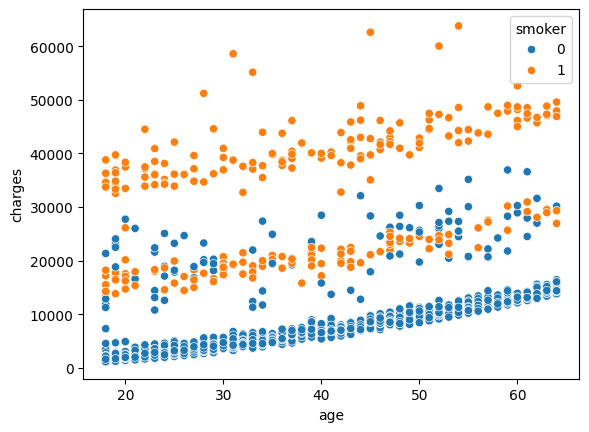

In [195]:
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')

In [162]:
correlation_matrix = df.corr()

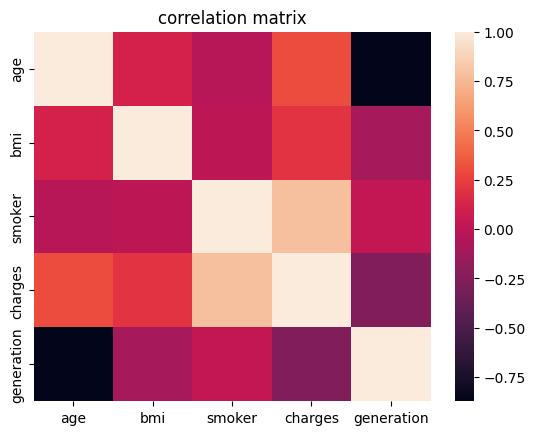

In [184]:
sns.heatmap(correlation_matrix)
plt.title('correlation matrix')
plt.show()

In [185]:
X = df.drop('charges', axis=1)
y = df.charges

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
from sklearn.preprocessing import StandardScaler

In [188]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [189]:
lr = LinearRegression()

In [190]:
lr.fit(X_train, y_train)

LinearRegression()

In [191]:
y_pred = lr.predict(X_test)

In [192]:
mean_absolute_error(y_test, y_pred)

4260.560091099391

In [ ]:
# Решение (Задача 1)
def show_age_charges(df):
    plt.plot(df['age'], df['charges'], 'ro') 
    plt.xlabel('age')
    plt.ylabel('charges')
    plt.title('Зависимость стоимости страховки от возраста')
    plt.show()

(228, 7)


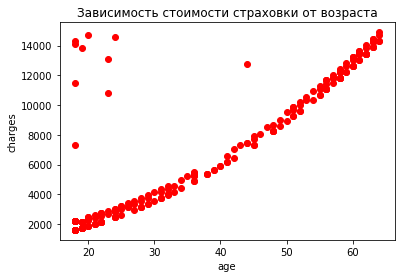

In [ ]:
df_new = df[(df.children==0) & (df.charges < 15000) & (df.sex == 'female')]
print(df_new.shape)

show_age_charges(df_new)

(218, 7)


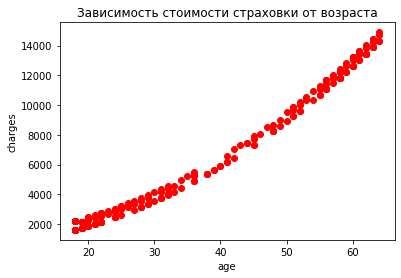

In [ ]:
# один из возможных вариантов удаления
indx = df_new[(df_new.charges >= 6000) & (df_new.age<30)].index
indx1 = df_new[(df_new.charges >= 12000) & (df_new.age<50)].index

df_new = df_new.drop(list(indx) + list(indx1))
print(df_new.shape)

show_age_charges(df_new)

In [ ]:
train, test = train_test_split(df_new, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(train[['age']], train.charges)
pred = lr.predict(test[['age']])
mean_absolute_error(test.charges, pred)

589.2828328455392

Замечание:
В видео мы обучали линейную регрессию на данных с выбросами, и ошибка была порядка ~1500$. Сейчас мы обучили модель без выбросов, и модель показала результат намного лучше. Линейная регрессия очень чувствительна к наличию выбросов в обучающей выборке. Поэтому данные нужно хорошо подготовить, прежде чем обучать на них линейную регрессию. 

-

-

-

In [ ]:
# Решение (Задача 2)
new_cols = ['age', 'bmi', 'charges']
train, test = train_test_split(df_new[new_cols], test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(train.drop(['charges'], axis=1), train.charges)
pred = lr.predict(test.drop(['charges'], axis=1))
mean_absolute_error(test.charges, pred)

590.8305083474556

-

-

-

In [ ]:
# Решение (Задача 3)
# смотрим какие колонки удалить
df_new.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,218.000000,218,218.000000,218.0,218,218,218.000000
unique,NaN,1,NaN,NaN,1,4,NaN
top,NaN,female,NaN,NaN,no,northeast,NaN
freq,NaN,218,NaN,NaN,218,58,NaN
mean,38.775229,NaN,30.310986,0.0,NaN,NaN,6739.594019
std,16.416243,NaN,5.958165,0.0,NaN,NaN,4455.839013
min,18.000000,NaN,17.290000,0.0,NaN,NaN,1607.510100
25%,22.000000,NaN,26.053750,0.0,NaN,NaN,2475.245350
50%,36.000000,NaN,29.925000,0.0,NaN,NaN,5269.996975
75%,56.000000,NaN,34.727500,0.0,NaN,NaN,11412.150800


In [ ]:
df_new2 = df_new.drop(['sex', 'children', 'smoker'], axis=1)

train, test = train_test_split(df_new2, test_size=0.2, random_state=42)
train.head()

,age,bmi,region,charges
521,32,44.220,southeast,3994.17780
579,25,23.465,northeast,3206.49135
671,29,31.160,northeast,3943.59540
789,62,29.920,southeast,13457.96080
523,38,37.730,southeast,5397.61670


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# кодируем с помощью ohe фичу region
ohe = OneHotEncoder(handle_unknown='ignore')
train_enc = pd.DataFrame(ohe.fit_transform(train[['region']]).toarray(), columns = ohe.categories_)
test_enc = pd.DataFrame(ohe.transform(test[['region']]).toarray(), columns = ohe.categories_)

train_enc.head()

,northeast,northwest,southeast,southwest
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [ ]:
# добавляем преобразованную категориальную фичу в датафрейм. исходное представление фичи дропаем
train = train.join(train_enc.set_index(train.index)).drop(['region'], axis=1)
test = test.join(test_enc.set_index(test.index)).drop(['region'], axis=1)
train.head()

,age,bmi,charges,"(northeast,)","(northwest,)","(southeast,)","(southwest,)"
521,32,44.220,3994.17780,0.0,0.0,1.0,0.0
579,25,23.465,3206.49135,1.0,0.0,0.0,0.0
671,29,31.160,3943.59540,1.0,0.0,0.0,0.0
789,62,29.920,13457.96080,0.0,0.0,1.0,0.0
523,38,37.730,5397.61670,0.0,0.0,1.0,0.0


In [ ]:
lr.fit(train.drop(['charges'], axis=1), train.charges)
pred = lr.predict(test.drop(['charges'], axis=1))
mean_absolute_error(test.charges, pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


535.5915097964667